In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/uber/Raw data.xlsx')
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,2024-06-30 16:42:40.320000,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
min,2024-01-01 00:00:00,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,2024-03-31 00:00:00,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,2024-07-01 00:00:00,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,2024-09-30 00:00:00,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,2024-12-30 00:00:00,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000
std,NaN,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


In [ ]:
df_clean=df.copy()

In [ ]:
df_clean.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [ ]:
group_means1 = df_clean.groupby(['Vehicle Type','Pickup Location'])['Avg VTAT'].transform('mean')
overall_mean1 = df_clean['Avg VTAT'].mean()
df_clean['Avg VTAT'].fillna(group_means1, inplace=True)
df_clean['Avg VTAT'].fillna(overall_mean1, inplace=True)

In [ ]:
group_means2 = df_clean.groupby(['Pickup Location'])['Avg CTAT'].transform('mean')
overall_mean2 = df_clean['Avg CTAT'].mean()
df_clean['Avg CTAT'].fillna(group_means2, inplace=True)
df_clean['Avg CTAT'].fillna(overall_mean2, inplace=True)

In [ ]:
group_means_booking = df_clean.groupby(['Pickup Location', 'Drop Location'])['Booking Value'].transform('mean')
overall_mean_booking = df_clean['Booking Value'].mean()
df_clean['Booking Value'] = df_clean['Booking Value'].fillna(group_means_booking)
df_clean['Booking Value'] = df_clean['Booking Value'].fillna(overall_mean_booking)

In [ ]:
group_means_distance = df_clean.groupby(['Pickup Location', 'Drop Location'])['Ride Distance'].transform('mean')
overall_mean_distance = df_clean['Ride Distance'].mean()
df_clean['Ride Distance'] = df_clean['Ride Distance'].fillna(group_means_distance)
df_clean['Ride Distance'] = df_clean['Ride Distance'].fillna(overall_mean_distance)

In [ ]:
group_means_driver = df_clean.groupby(['Vehicle Type'])['Driver Ratings'].transform('mean')
overall_mean_driver = df_clean['Driver Ratings'].mean()
df_clean['Driver Ratings'] = df_clean['Driver Ratings'].fillna(group_means_driver)
df_clean['Driver Ratings'] = df_clean['Driver Ratings'].fillna(overall_mean_driver)

In [ ]:
group_means_customer = df_clean.groupby(['Vehicle Type','Customer ID'])['Customer Rating'].transform('mean')
overall_mean_customer = df_clean['Customer Rating'].mean()
df_clean['Customer Rating'] = df_clean['Customer Rating'].fillna(group_means_customer)
df_clean['Customer Rating'] = df_clean['Customer Rating'].fillna(overall_mean_customer)

In [ ]:
group_mode_payment = df_clean.groupby(['Pickup Location', 'Drop Location','Customer ID'])['Payment Method'].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
overall_mode_payment = df_clean['Payment Method'].mode()[0]
df_clean['Payment Method'] = df_clean['Payment Method'].fillna(group_mode_payment)
df_clean['Payment Method'] = df_clean['Payment Method'].fillna(overall_mode_payment)


In [ ]:
df_clean.loc[
    df_clean[['Cancelled Rides by Customer',
              'Cancelled Rides by Driver',
              'Incomplete Rides']].notna().any(axis=1),
    'Driver Ratings'
] = np.nan

In [ ]:
df_clean.loc[
    df_clean[['Cancelled Rides by Customer',
              'Cancelled Rides by Driver',
              'Incomplete Rides']].notna().any(axis=1),
    'Customer Rating'
] = np.nan

In [ ]:
df_clean.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


In [ ]:
df_clean['Cancelled Rides by Customer'].fillna(0, inplace=True)
df_clean['Reason for cancelling by Customer'].fillna('Not Cancelled', inplace=True)
df_clean['Cancelled Rides by Driver'].fillna(0, inplace=True)
df_clean['Driver Cancellation Reason'].fillna('Not Cancelled', inplace=True)
df_clean['Incomplete Rides'].fillna(0, inplace=True)
df_clean['Incomplete Rides Reason'].fillna('Completed', inplace=True)
df_clean['Customer Rating'].fillna(0, inplace=True)
df_clean['Driver Ratings'].fillna(0, inplace=True)

In [ ]:
df_clean.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


In [ ]:
df_clean.to_excel('cleaned_data.xlsx', index=False)

In [ ]:
total_rides = len(df_clean)
customer_cancel = df_clean["Cancelled Rides by Customer"].notnull().sum()
driver_cancel = df_clean["Cancelled Rides by Driver"].notnull().sum()
incomplete_rides = df_clean["Incomplete Rides"].notnull().sum()
completed_rides = (df_clean['Booking Status'] == 'Completed').sum()
avg_distance = df_clean["Ride Distance"].mean()
avg_booking_value = df_clean["Booking Value"].mean()
avg_vtat = df_clean["Avg VTAT"].mean()
avg_ctat = df_clean["Avg CTAT"].mean()
completed_ratio = (completed_rides / total_rides) * 100
customer_cancel_ratio = (customer_cancel / total_rides) * 100
driver_cancel_ratio = (driver_cancel / total_rides) * 100
incomplete_ratio = (incomplete_rides / total_rides) * 100
print("📊 Key KPIs from the Dataset")
print("-"*40)
print(f"Total Rides                : {total_rides}")
print(f"Completed Rides            : {completed_rides} ({completed_ratio:.2f}%)")
print(f"Customer Cancellations     : {customer_cancel} ({customer_cancel_ratio:.2f}%)")
print(f"Driver Cancellations       : {driver_cancel} ({driver_cancel_ratio:.2f}%)")
print(f"Incomplete Rides           : {incomplete_rides} ({incomplete_ratio:.2f}%)")

📊 Key KPIs from the Dataset
----------------------------------------
Total Rides                : 150000
Completed Rides            : 93000 (62.00%)
Customer Cancellations     : 150000 (100.00%)
Driver Cancellations       : 150000 (100.00%)
Incomplete Rides           : 150000 (100.00%)
----------------------------------------
Average Ride Distance (km) : 24.66
Average Booking Value      : 507.76
Average VTAT (min)         : 8.46
Average CTAT (min)         : 29.15


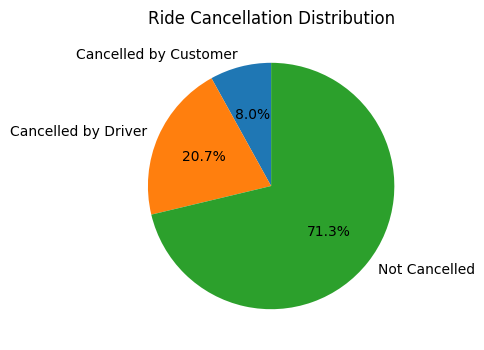

In [ ]:
customer_cancel_count = df_clean[df_clean['Cancelled Rides by Customer'] == 1].shape[0]
driver_cancel_count = df_clean[df_clean['Cancelled Rides by Driver'] == 1].shape[0]
completed_count = df_clean[df_clean['Booking Status'] == 'Completed'].shape[0]
not_cancelled_count = completed_count
labels = ['Cancelled by Customer', 'Cancelled by Driver', 'Not Cancelled']
values = [customer_cancel_count, driver_cancel_count, not_cancelled_count]
plt.figure(figsize=(4,4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Ride Cancellation Distribution')
plt.show()

<Axes: ylabel='Reason for cancelling by Customer'>

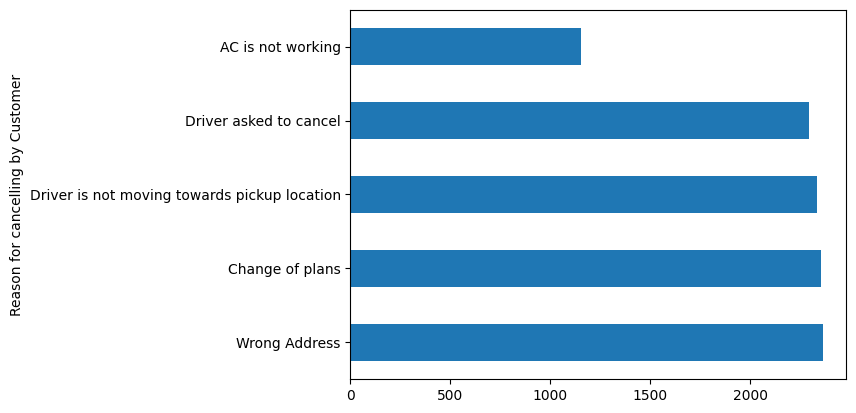

In [ ]:
df['Reason for cancelling by Customer'].value_counts().plot(kind='barh')

<Axes: ylabel='Driver Cancellation Reason'>

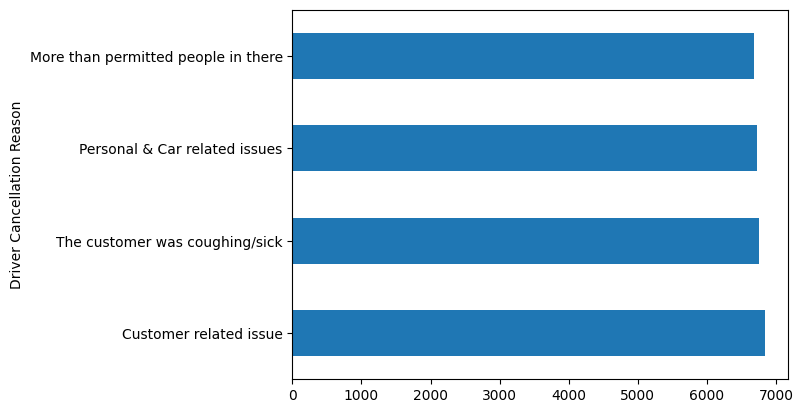

In [ ]:
df['Driver Cancellation Reason'].value_counts().plot(kind='barh')

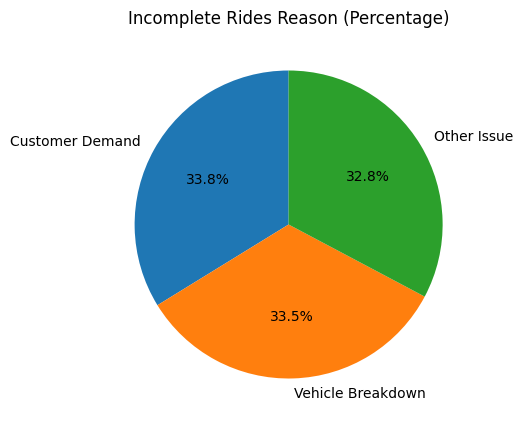

In [ ]:
incomplete_reasons = df['Incomplete Rides Reason'].value_counts(normalize=True) * 100
plt.figure(figsize=(5,5))
plt.pie(incomplete_reasons, labels=incomplete_reasons.index, autopct='%1.1f%%', startangle=90)
plt.title('Incomplete Rides Reason (Percentage)')
plt.show()